# Notebook Imports

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Gathering Data

In [3]:
#California 

housing = fetch_california_housing() # stores the dataset

In [4]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

### Information about this dataset

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Data points and features

In [6]:
type(housing.data)

numpy.ndarray

In [7]:
housing.data.shape

(20640, 8)

This dataset shows 20640 instances and 8 attributes (columns)

In [8]:
housing.feature_names # column names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
housing.target # house prices in hundreds of thousands of dollars

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# Data exploration with Pandas

In [10]:
california_data = pd.DataFrame(data = housing.data, columns = housing.feature_names)

In [11]:
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
# Add column with the price

california_data['Price'] = housing.target

In [13]:
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Cleaning data - check  for missing values

It is important to feed clean data to our algorithm.

In [14]:
# Check rows with null values using isnull() and .any()
pd.isnull(california_data).any()

# We'll see that in this case, there are not missing values in this data set
# Because there is no "True" in the data

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
Price         False
dtype: bool

In [15]:
# Another way of checking for null values:

california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Visualization: Histograms, Distributions and Scatterplots

### Matplotlib

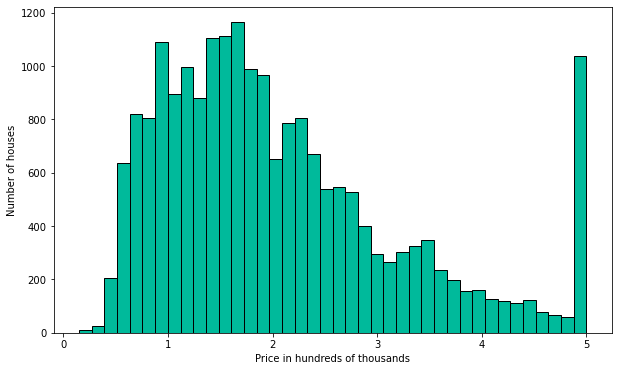

In [16]:
plt.figure(figsize = (10, 6))
plt.hist(california_data['Price'], bins = 40, ec = 'black', color = '#00ba9b')  # Histogram for price
# ec = colours that separate the lines
# bins = number of boxes you want the data to be separated in
plt.xlabel('Price in hundreds of thousands')
plt.ylabel('Number of houses')
plt.show()

### Seaborn

House unit per price

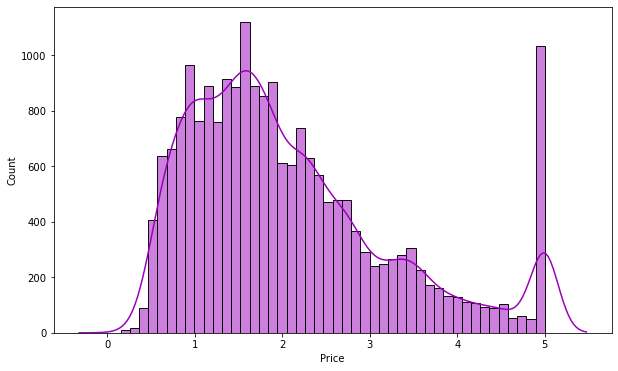

In [48]:


plt.figure(figsize = (10, 6))
sns.histplot(california_data['Price'],  kde=True, kde_kws=dict(cut=3), color = '#9b00ba')
plt.show()

# stat="density" :  to show
# kde = kernel density estimate line/ probablity density function
# kde_kws=dict(cut=3) : so that the line does not only cover the data

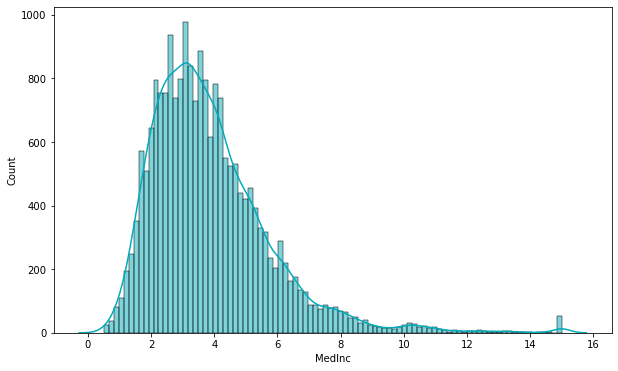

In [53]:
plt.figure(figsize = (10, 6))
sns.histplot(california_data['MedInc'],  kde=True, kde_kws=dict(cut=3), color = '#00abba')
plt.show()


In [32]:
# We see that the data is a bit skewed
california_data['Price'].skew()

0.9777632739098345

Spatial location of the houses using a scatterplot.
The shape of California appears on it!

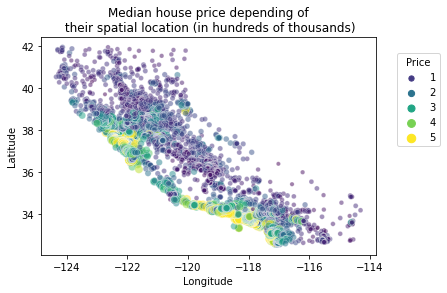

In [58]:
sns.scatterplot(data=california_data, x="Longitude", y="Latitude",
                size="Price", hue="Price",
                palette="viridis", alpha=0.5)
plt.legend(title="Price", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house price depending of\n their spatial location (in hundreds of thousands)")

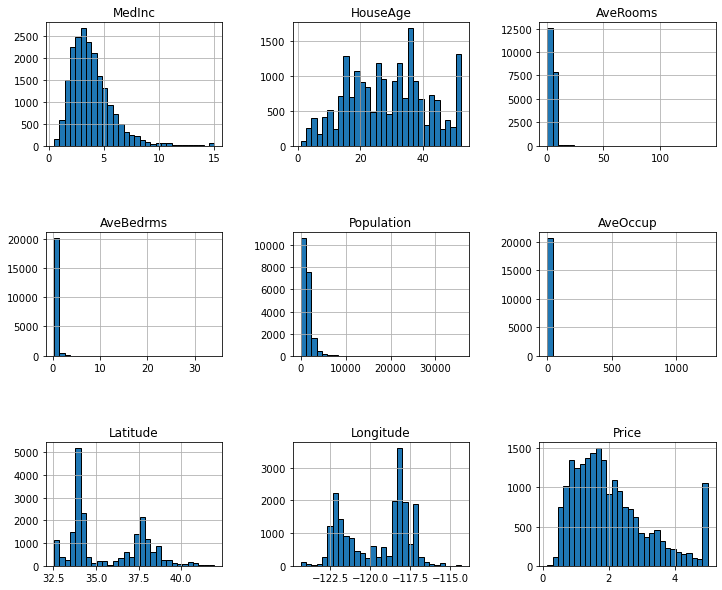

In [50]:
california_data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Median Income and Median House value have a long tail
# House age has a pretty even distribution

In [66]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_data[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


In [62]:
sample_df = california_data.sample(frac=0.1, random_state=17)

In [63]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

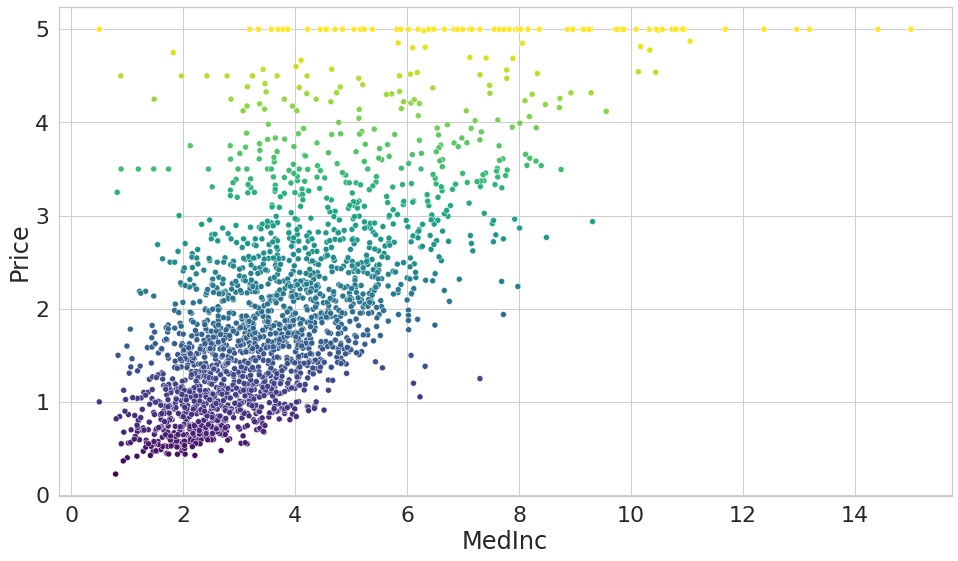

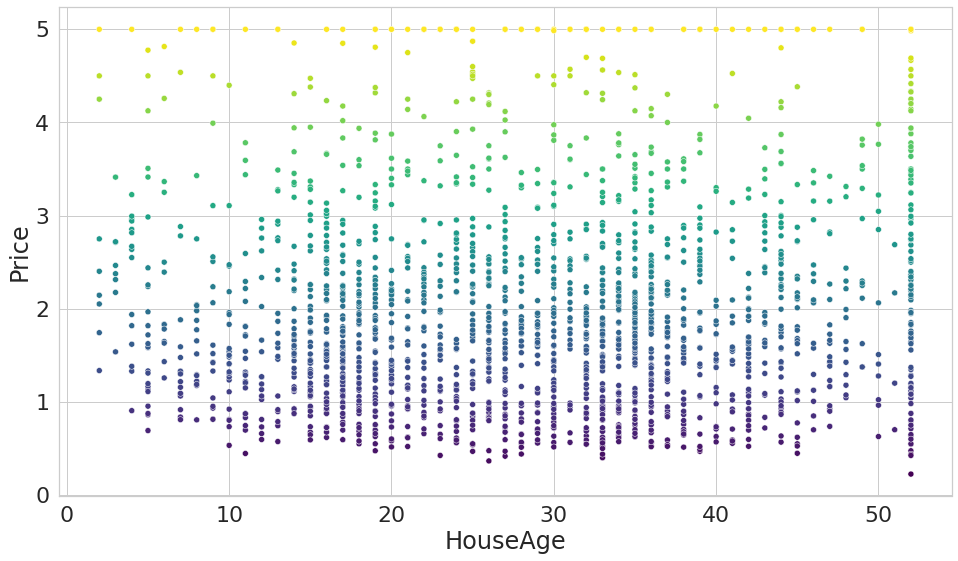

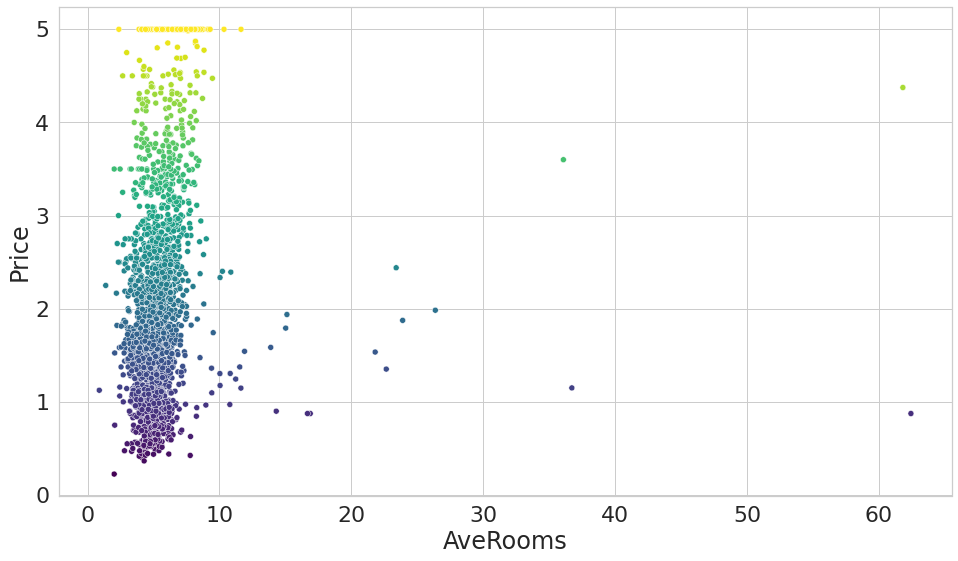

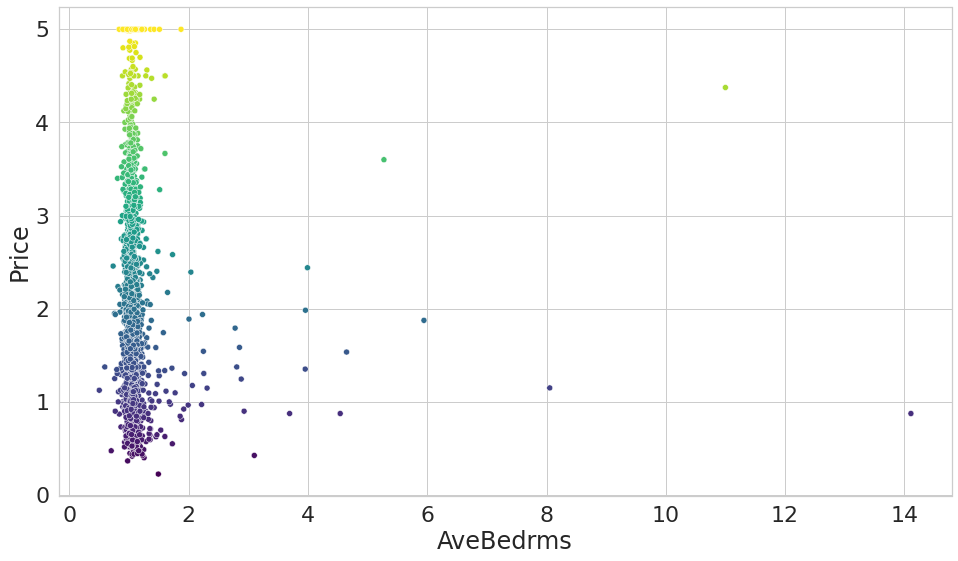

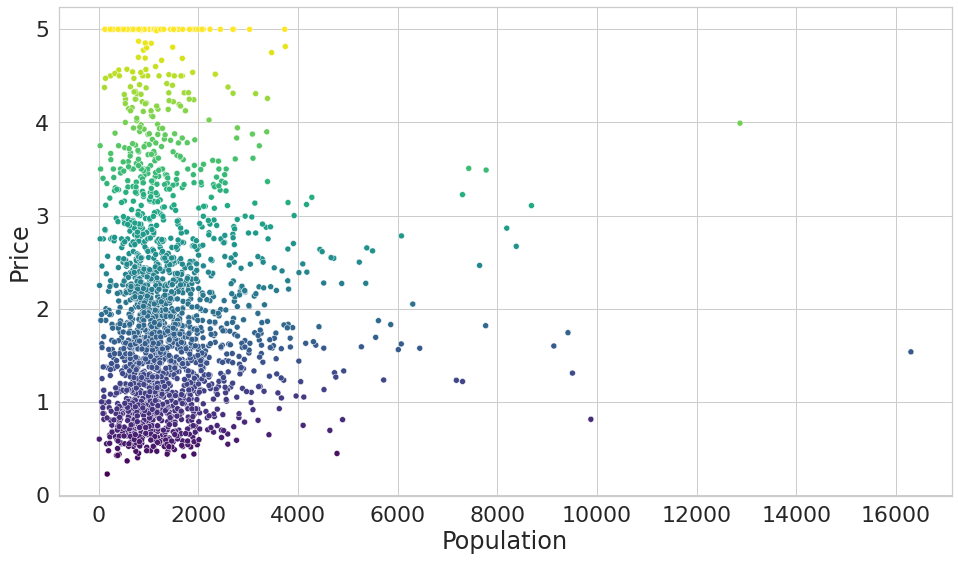

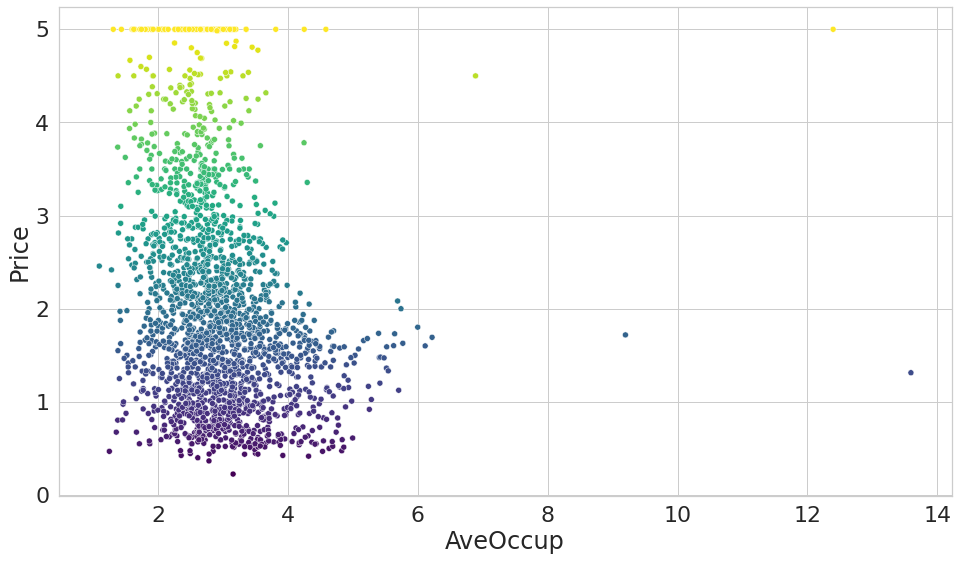

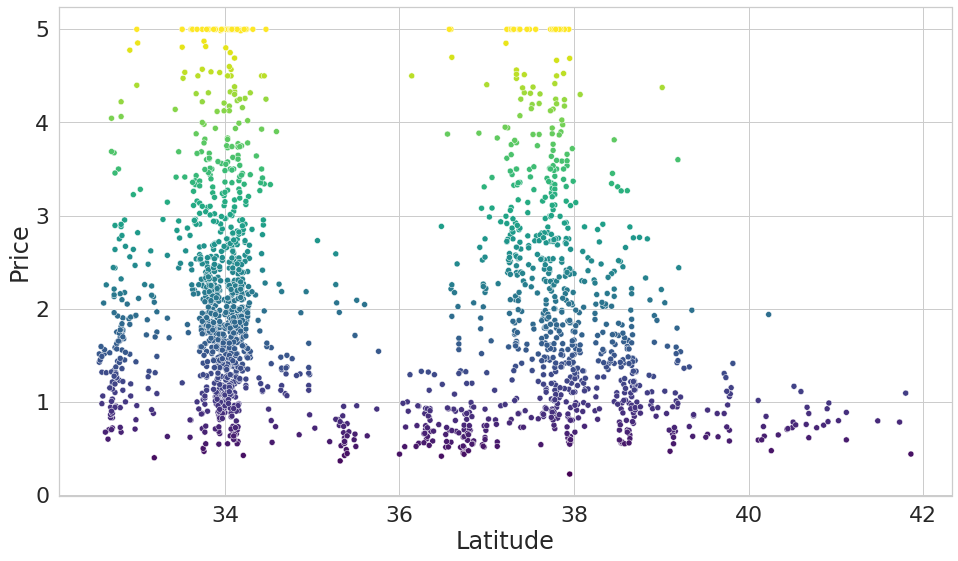

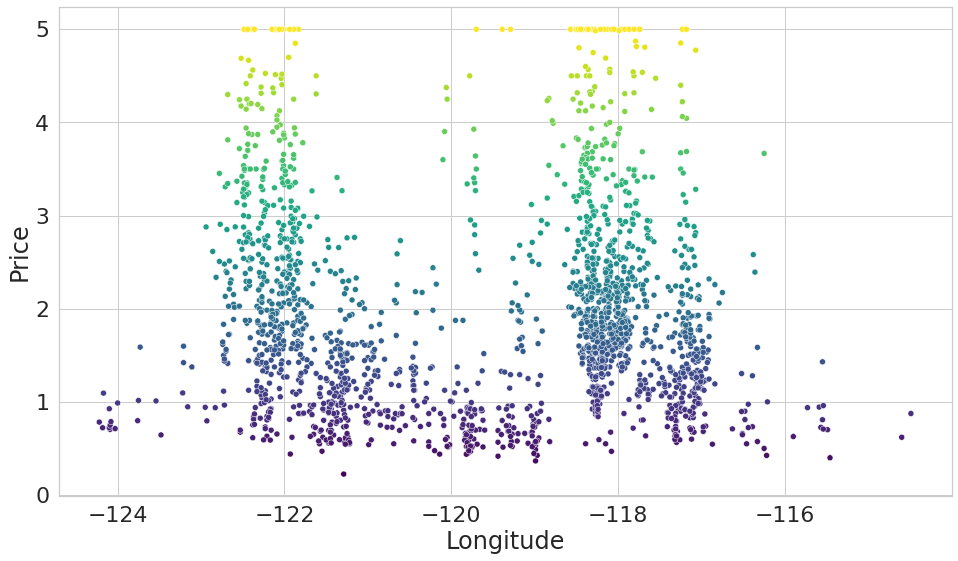

In [88]:
# The plots, but now in seaborn!

for feature in housing.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature, y='Price', hue='Price',  palette='viridis', legend=False)


# Linear Regression

In [72]:
# Data split

X_train, X_test, y_train, y_test = train_test_split(housing.data, 
                                                    housing.target, random_state=11)

In [70]:
linear_regression = LinearRegression()

In [75]:
linear_regression.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize=False)

LinearRegression()

In [79]:
for i, name in enumerate(housing.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')
    
    """
    For positive coefficients, 
    the median house value increases as the feature value increases. 
    """

    MedInc: 0.4377030215382207
  HouseAge: 0.009216834565797956
  AveRooms: -0.10732526637360928
 AveBedrms: 0.6117133073918094
Population: -5.7568220092826805e-06
  AveOccup: -0.003384566465716291
  Latitude: -0.41948186096490614
 Longitude: -0.43377133498740217


# Testing the Model

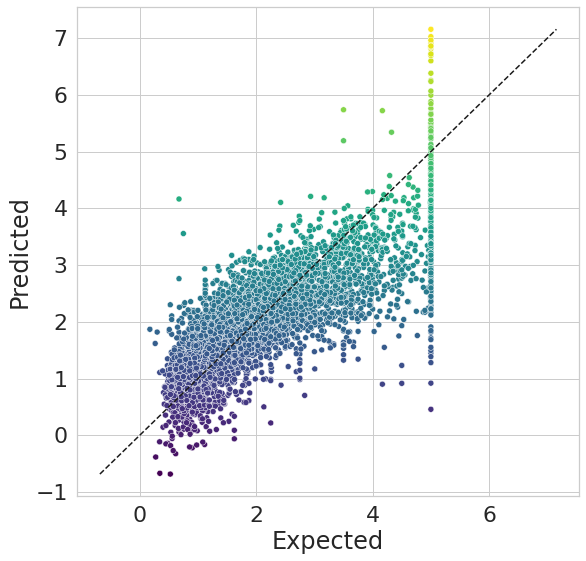

In [89]:
predicted = linear_regression.predict(X_test)
expected = y_test

# Setting this up in a DataFrame to make some pretty comparisons

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',  
                       hue='Predicted', palette='viridis', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

line = plt.plot([start, end], [start, end], 'k--')

# The Metrics

In [82]:
from sklearn import metrics
metrics.r2_score(expected, predicted)

"""
Output: 0.600898311596433
The coefficient of determination of r2 score is closer to 1 than to 0.
A score of 1 would mean that the estimate is perfect at predicting

"""

0.600898311596433

In [83]:
metrics.mean_squared_error(expected, predicted)

"""
Output: 0.535014977444912
MSE: calculates the error, that is, the difference between each expected and predicted value

"""

0.535014977444912